In [2]:
import pandas as pd

heart_data = pd.read_csv("C:\\Users\\lisal\\Documents\\project_4\\Resources\\heart_attack_risk.csv")


C:\Users\lisal\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
print(heart_data.columns)


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [4]:
grouped_data = heart_data.groupby(['Age', 'Heart Attack Risk']).size().unstack()


In [5]:
# Fill NaN values with 0 after unstacking
grouped_data = grouped_data.fillna(0)

# Now calculate the percentage
grouped_data['Percentage_At_Risk'] = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100

# Display the result
print(grouped_data['Percentage_At_Risk'])


Age
18    33.333333
19    31.250000
20    30.000000
21    35.042735
22    32.258065
        ...    
86    43.809524
87    42.857143
88    33.333333
89    36.752137
90    36.184211
Name: Percentage_At_Risk, Length: 73, dtype: float64


In [6]:
# Assume heart_data is your DataFrame after loading the CSV
smoking_data = heart_data.groupby(['Smoking', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
smoking_data = smoking_data.fillna(0)

# Calculate the percentage of smokers with heart attack risk
smokers_risk_percent = (smoking_data.loc[1, 1] / smoking_data.loc[1].sum()) * 100

# Calculate the percentage of non-smokers with heart attack risk
nonsmokers_risk_percent = (smoking_data.loc[0, 1] / smoking_data.loc[0].sum()) * 100

# Print the results
print(f"Percentage of smokers at risk of heart attack: {smokers_risk_percent}%")
print(f"Percentage of non-smokers at risk of heart attack: {nonsmokers_risk_percent}%")


Percentage of smokers at risk of heart attack: 35.75518513805827%
Percentage of non-smokers at risk of heart attack: 36.39380530973451%


In [7]:
import pandas as pd

# Assume heart_data is your DataFrame after loading the CSV
# Categorize age into groups
def age_group(age):
    if age < 31:
        return 'Below 30'
    elif 31 <= age <= 60:
        return '31-60'
    else:
        return '61 and above'

# Apply the function to the age column to create a new 'Age_Group' column
heart_data['Age_Group'] = heart_data['Age'].apply(age_group)

# Group by 'Age_Group' and 'Heart_Attack_Risk' and calculate the size of each group
age_group_data = heart_data.groupby(['Age_Group', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
age_group_data = age_group_data.fillna(0)

# Calculate the percentage of heart attack risk for each age group
age_group_data['Percentage_At_Risk'] = (age_group_data[1] / (age_group_data[0] + age_group_data[1])) * 100

# Display the results
print(age_group_data['Percentage_At_Risk'])


Age_Group
31-60           35.169727
61 and above    36.325267
Below 30        36.160991
Name: Percentage_At_Risk, dtype: float64


In [8]:
# Group the data by 'Diabetes' and 'Heart_Attack_Risk'
diabetes_data = heart_data.groupby(['Diabetes', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
diabetes_data = diabetes_data.fillna(0)

# Calculate the percentage of diabetics with heart attack risk
diabetics_risk_percent = (diabetes_data.loc[1, 1] / diabetes_data.loc[1].sum()) * 100

# Calculate the percentage of non-diabetics with heart attack risk
nondiabetics_risk_percent = (diabetes_data.loc[0, 1] / diabetes_data.loc[0].sum()) * 100

# Print the results
print(f"Percentage of diabetics at risk of heart attack: {diabetics_risk_percent}%")
print(f"Percentage of non-diabetics at risk of heart attack: {nondiabetics_risk_percent}%")


Percentage of diabetics at risk of heart attack: 36.42407277816655%
Percentage of non-diabetics at risk of heart attack: 34.68985887758451%


In [9]:
# Filter for smokers with diabetes
smokers_diabetics = heart_data[(heart_data['Smoking'] == 1) & (heart_data['Diabetes'] == 1)]

# Filter for non-smokers without diabetes
non_smokers_non_diabetics = heart_data[(heart_data['Smoking'] == 0) & (heart_data['Diabetes'] == 0)]

# Calculate the percentage of heart attack risk for smokers with diabetes
smokers_diabetics_risk_percent = (smokers_diabetics['Heart Attack Risk'].sum() / len(smokers_diabetics)) * 100

# Calculate the percentage of heart attack risk for non-smokers without diabetes
non_smokers_non_diabetics_risk_percent = (non_smokers_non_diabetics['Heart Attack Risk'].sum() / len(non_smokers_non_diabetics)) * 100

# Print the results
print(f"Percentage of smokers with diabetes at risk of heart attack: {smokers_diabetics_risk_percent}%")
print(f"Percentage of non-smokers without diabetes at risk of heart attack: {non_smokers_non_diabetics_risk_percent}%")


Percentage of smokers with diabetes at risk of heart attack: 36.122488784864444%
Percentage of non-smokers without diabetes at risk of heart attack: 31.428571428571427%


In [10]:
# Group the data by 'Sex' and 'Heart_Attack_Risk'
sex_data = heart_data.groupby(['Sex', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
sex_data = sex_data.fillna(0)

# Calculate the percentage of heart attack risk for males
males_risk_percent = (sex_data.loc['Male', 1] / sex_data.loc['Male'].sum()) * 100

# Calculate the percentage of heart attack risk for females
females_risk_percent = (sex_data.loc['Female', 1] / sex_data.loc['Female'].sum()) * 100

# Print the results
print(f"Percentage of males at risk of heart attack: {males_risk_percent}%")
print(f"Percentage of females at risk of heart attack: {females_risk_percent}%")


Percentage of males at risk of heart attack: 35.91883488790705%
Percentage of females at risk of heart attack: 35.59577677224736%


In [11]:
# Group the data by 'Family History' and 'Heart Attack Risk'
family_history_data = heart_data.groupby(['Family History', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
family_history_data = family_history_data.fillna(0)

# Calculate the percentage of heart attack risk for those with family history (1)
family_history_risk_percent = (family_history_data.loc[1, 1] / family_history_data.loc[1].sum()) * 100

# Calculate the percentage of heart attack risk for those without family history (0)
no_family_history_risk_percent = (family_history_data.loc[0, 1] / family_history_data.loc[0].sum()) * 100

# Print the results
print(f"Percentage of individuals with a family history at risk of heart attack: {family_history_risk_percent}%")
print(f"Percentage of individuals without a family history at risk of heart attack: {no_family_history_risk_percent}%")


Percentage of individuals with a family history at risk of heart attack: 35.74074074074074%
Percentage of individuals without a family history at risk of heart attack: 35.89916722934954%


In [12]:
# Group the data by 'Previous Heart Problems' and 'Heart Attack Risk'
previous_heart_problems_data = heart_data.groupby(['Previous Heart Problems', 'Heart Attack Risk']).size().unstack()

# Fill NaN values with 0 in case there are any
previous_heart_problems_data = previous_heart_problems_data.fillna(0)

# Calculate the percentage of heart attack risk for those with previous heart problems (1)
with_previous_problems_risk_percent = (previous_heart_problems_data.loc[1, 1] / previous_heart_problems_data.loc[1].sum()) * 100

# Calculate the percentage of heart attack risk for those without previous heart problems (0)
without_previous_problems_risk_percent = (previous_heart_problems_data.loc[0, 1] / previous_heart_problems_data.loc[0].sum()) * 100

# Print the results
print(f"Percentage of individuals with previous heart problems at risk of heart attack: {with_previous_problems_risk_percent}%")
print(f"Percentage of individuals without previous heart problems at risk of heart attack: {without_previous_problems_risk_percent}%")


Percentage of individuals with previous heart problems at risk of heart attack: 35.8342922899885%
Percentage of individuals without previous heart problems at risk of heart attack: 35.808057944771384%


In [13]:
# Correctly continuing the condition across multiple lines
all_risk_factors = ((heart_data['Smoking'] == 1) & (heart_data['Diabetes'] == 1) & 
                    (heart_data['Family History'] == 1) & (heart_data['Previous Heart Problems'] == 1))

# Condition for individuals with none of the risk factors
no_risk_factors = ((heart_data['Smoking'] == 0) & (heart_data['Diabetes'] == 0) & 
                   (heart_data['Family History'] == 0) & (heart_data['Previous Heart Problems'] == 0))


In [14]:
# Assuming corrections have been made to the syntax error
all_risk_factors = ((heart_data['Smoking'] == 1) & (heart_data['Diabetes'] == 1) & 
                    (heart_data['Family History'] == 1) & (heart_data['Previous Heart Problems'] == 1))

no_risk_factors = ((heart_data['Smoking'] == 0) & (heart_data['Diabetes'] == 0) & 
                   (heart_data['Family History'] == 0) & (heart_data['Previous Heart Problems'] == 0))

# Filter the DataFrame based on conditions
all_risks_group = heart_data[all_risk_factors]
no_risks_group = heart_data[no_risk_factors]

# Calculate the percentage of heart attack risk for each group
all_risks_risk_percent = (all_risks_group['Heart Attack Risk'].sum() / len(all_risks_group)) * 100
no_risks_risk_percent = (no_risks_group['Heart Attack Risk'].sum() / len(no_risks_group)) * 100

# Print the results
print(f"Percentage of individuals with all risk factors at risk of heart attack: {all_risks_risk_percent}%")
print(f"Percentage of individuals with no risk factors at risk of heart attack: {no_risks_risk_percent}%")


Percentage of individuals with all risk factors at risk of heart attack: 36.473429951690825%
Percentage of individuals with no risk factors at risk of heart attack: 32.58426966292135%


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk.csv")

# Define the conditions for each risk factor
conditions = {
    'Age Risk': (df['Age'] <= 30) | (df['Age'] >= 61),
    'Cholesterol Risk': df['Cholesterol'] >= 200,
    'Heart Rate Risk': (df['Heart Rate'] < 60) | (df['Heart Rate'] > 100),
    'Diabetes Risk': df['Diabetes'] == 1,
    'Family History Risk': df['Family History'] == 1,
    'Smoking Risk': df['Smoking'] == 1,
    'Obesity Risk': df['Obesity'] == 1,
    'Alcohol Risk': df['Alcohol Consumption'] == 1,
    'Exercise Risk': df['Exercise Hours Per Week'] <= 2,  # Assuming less than 2 hours of exercise is a risk
    'Diet Risk': df['Diet'] == 'unhealthy',
    'Previous Heart Problems Risk': df['Previous Heart Problems'] == 1,
    'Medication Use Risk': df['Medication Use'] == 1,
    'Stress Level Risk': df['Stress Level'] == 1,
    'Sedentary Risk': df['Sedentary Hours Per Day'] >= 8,  # Assuming more than 8 sedentary hours is a risk
    'BMI Risk': df['BMI'] >= 30,  # Assuming a BMI of 30 or more is obese
    'Triglycerides Risk': df['Triglycerides'] > 90,
    'Physical Activity Risk': df['Physical Activity Days Per Week'] <= 2,  # Assuming less than 2 days is a risk
    'Sleep Hours Risk': (df['Sleep Hours Per Day'] < 7) | (df['Sleep Hours Per Day'] > 9),  # Assuming 7-9 hours is ideal
}

# Apply the conditions and create new columns
for key, condition in conditions.items():
    df[key] = condition.astype(int)

# Calculate the total number of risk factors
df['Total Risk Factors'] = df[list(conditions.keys())].sum(axis=1)

# Add the Heart Attack Risk column (assuming it's already in the dataset)
df['Heart Attack Risk'] = df['Heart Attack Risk']  # This line may not be needed if the column already exists

# Save the new dataset to a new CSV file
df.to_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors.csv", index=False)


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk.csv")

# Define the conditions for each risk factor
conditions = {
    'Age Risk': (df['Age'] <= 30) | (df['Age'] >= 61),
    'Cholesterol Risk': df['Cholesterol'] >= 200,
    'Heart Rate Risk': (df['Heart Rate'] < 60) | (df['Heart Rate'] > 100),
    'Diabetes Risk': df['Diabetes'] == 1,
    'Family History Risk': df['Family History'] == 1,
    'Smoking Risk': df['Smoking'] == 1,
    'Obesity Risk': df['Obesity'] == 1,
    'Alcohol Risk': df['Alcohol Consumption'] == 1,
    'Exercise Risk': df['Exercise Hours Per Week'] <= 2,  # Assuming less than 2 hours of exercise is a risk
    'Diet Risk': df['Diet'] == 'unhealthy',
    'Previous Heart Problems Risk': df['Previous Heart Problems'] == 1,
    'Medication Use Risk': df['Medication Use'] == 1,
    'Stress Level Risk': df['Stress Level'] == 1,
    'Sedentary Risk': df['Sedentary Hours Per Day'] >= 8,  # Assuming more than 8 sedentary hours is a risk
    'BMI Risk': df['BMI'] >= 30,  # Assuming a BMI of 30 or more is obese
    'Triglycerides Risk': df['Triglycerides'] > 90,
    'Physical Activity Risk': df['Physical Activity Days Per Week'] <= 2,  # Assuming less than 2 days is a risk
    'Sleep Hours Risk': (df['Sleep Hours Per Day'] < 7) | (df['Sleep Hours Per Day'] > 9),  # Assuming 7-9 hours is ideal
}

# Apply the conditions and create new columns
for key, condition in conditions.items():
    df[key] = condition.astype(int)

# Calculate the total number of risk factors
df['Total Risk Factors'] = df[list(conditions.keys())].sum(axis=1)

# Define the Heart Attack Risk based on the number of risk factors (change the threshold as needed)
df['Final Heart Attack Risk'] = (df['Total Risk Factors'] >= 5).astype(int)

# Save the new dataset to a new CSV file
df.to_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv", index=False)


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# Group the data by the number of risk factors and count how many are at risk
risk_factor_counts = df.groupby('Total Risk Factors')['Final Heart Attack Risk'].sum()

# Print out the counts
print(risk_factor_counts)


Total Risk Factors
2        0
3        0
4        0
5      276
6      626
7     1257
8     1827
9     1763
10    1414
11     931
12     410
13     143
14      26
15       5
Name: Final Heart Attack Risk, dtype: int64


In [18]:
# Convert the Series to a DataFrame
risk_factor_counts_df = risk_factor_counts.reset_index()
risk_factor_counts_df.columns = ['Number of Risk Factors', 'People at Risk for Heart Attack']

# Save to a CSV file
risk_factor_counts_df.to_csv(r"C:\Users\lisal\Documents\project_4\Resources\people_at_risk_by_number_of_factors.csv", index=False)

# Optional: Print the DataFrame
print(risk_factor_counts_df)


    Number of Risk Factors  People at Risk for Heart Attack
0                        2                                0
1                        3                                0
2                        4                                0
3                        5                              276
4                        6                              626
5                        7                             1257
6                        8                             1827
7                        9                             1763
8                       10                             1414
9                       11                              931
10                      12                              410
11                      13                              143
12                      14                               26
13                      15                                5


In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# Calculate the total number of individuals for each risk factor count
total_individuals_by_risk_factor = df.groupby('Total Risk Factors').size()

# Calculate the number of individuals at risk for each risk factor count
at_risk_individuals_by_risk_factor = df.groupby('Total Risk Factors')['Final Heart Attack Risk'].sum()

# Calculate the percentage of individuals at risk for each risk factor count
percentage_at_risk_by_risk_factor = (at_risk_individuals_by_risk_factor / total_individuals_by_risk_factor) * 100

# Create a DataFrame to display the results
percentage_risk_df = pd.DataFrame({
    'Number of Risk Factors': percentage_at_risk_by_risk_factor.index,
    'Percentage at Risk for Heart Attack': percentage_at_risk_by_risk_factor.values
})

# Optional: Print the DataFrame
print(percentage_risk_df)

# Save the results to a CSV file
percentage_risk_df.to_csv(r"C:\Users\lisal\Documents\project_4\Resources\percentage_at_risk_by_number_of_factors.csv", index=False)


    Number of Risk Factors  Percentage at Risk for Heart Attack
0                        2                                  0.0
1                        3                                  0.0
2                        4                                  0.0
3                        5                                100.0
4                        6                                100.0
5                        7                                100.0
6                        8                                100.0
7                        9                                100.0
8                       10                                100.0
9                       11                                100.0
10                      12                                100.0
11                      13                                100.0
12                      14                                100.0
13                      15                                100.0


In [1]:
import pandas as pd

# Adjust the path to where your CSV is located
file_path = r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk.csv"

# Try to load the dataset and print the shape
df = pd.read_csv(file_path)
print("Dataset loaded. Number of rows:", df.shape[0])


Dataset loaded. Number of rows: 8763


C:\Users\lisal\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
print(df.columns)


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [4]:
# Example of calculating a 'Total Risk Factors' column based on hypothetical criteria
df['Total Risk Factors'] = (df['Diabetes'] + df['Family History'] + df['Smoking'] + 
                            df['Obesity'] + df['Alcohol Consumption'] + 
                            (df['Exercise Hours Per Week'] <= 2).astype(int) + 
                            df['Medication Use'] + df['Stress Level'])

# Now try the groupby operation again
risk_factor_counts = df.groupby('Total Risk Factors')['Heart Attack Risk'].sum()
print(risk_factor_counts)


Total Risk Factors
1       0
2       6
3      50
4     149
5     215
6     286
7     331
8     311
9     321
10    332
11    306
12    295
13    262
14    180
15     75
16     19
17      1
Name: Heart Attack Risk, dtype: int64


In [5]:
# Assuming 'Total Risk Factors' and 'Heart Attack Risk' columns exist
risk_factor_counts = df.groupby('Total Risk Factors')['Heart Attack Risk'].sum()
print(risk_factor_counts)


Total Risk Factors
1       0
2       6
3      50
4     149
5     215
6     286
7     331
8     311
9     321
10    332
11    306
12    295
13    262
14    180
15     75
16     19
17      1
Name: Heart Attack Risk, dtype: int64


In [6]:
# Example user responses
user_responses = [1, 0, 1, 1, 0, 1, 0, 1]  # Replace with actual responses

# The columns you want to compare with the user's responses
risk_factor_columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                       'Exercise Hours Per Week', 'Medication Use', 'Stress Level']

# Convert exercise hours to binary based on the provided threshold
df['Exercise Risk'] = (df['Exercise Hours Per Week'] <= 2).astype(int)

# Now match the user's responses to the profiles in the dataset
matches = df[risk_factor_columns] == user_responses

# A match occurs when all the responses line up with the risk factors
matched_profiles = matches.all(axis=1)

print(f"Matching profiles found: {matched_profiles.sum()}")


Matching profiles found: 0


In [7]:
# Example adjustment for looser matching criteria
matches = df[risk_factor_columns].isin(user_responses)
matched_rows = matches.any(axis=1)  # Change to `.all(axis=1)` for strict matching

# Count how many profiles have at least one matching risk factor
print(f"Profiles with at least one matching risk factor: {matched_rows.sum()}")


Profiles with at least one matching risk factor: 8763


In [8]:
# Assuming 'Heart Attack Risk' is a column indicating if someone is at risk (1) or not (0)
at_risk_count = df.loc[matched_rows, 'Heart Attack Risk'].sum()
total_matched_profiles = matched_rows.sum()
percentage_at_risk = (at_risk_count / total_matched_profiles) * 100

print(f"Among the profiles with at least one matching risk factor, {percentage_at_risk:.2f}% are at risk for having a heart attack.")


Among the profiles with at least one matching risk factor, 35.82% are at risk for having a heart attack.


In [9]:
risk_percentage = 35.82  # The calculated risk percentage

# Generate personalized feedback
feedback = f"Based on your responses, you share risk factors with profiles that have a {risk_percentage}% risk of having a heart attack. "
feedback += "We recommend consulting a healthcare provider for a comprehensive assessment and personalized advice. "
feedback += "Lifestyle changes such as improving diet, increasing physical activity, and managing stress can also help reduce your risk."

print(feedback)


Based on your responses, you share risk factors with profiles that have a 35.82% risk of having a heart attack. We recommend consulting a healthcare provider for a comprehensive assessment and personalized advice. Lifestyle changes such as improving diet, increasing physical activity, and managing stress can also help reduce your risk.


In [10]:
# Assuming each risk factor is already encoded as 0 or 1
risk_factors_columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                        'Exercise Hours Per Week', 'Medication Use', 'Stress Level']

# Calculate correlations
correlations = df[risk_factors_columns + ['Heart Attack Risk']].corr()['Heart Attack Risk'].sort_values(ascending=False)

print("Correlation of risk factors with Heart Attack Risk:")
print(correlations)


Correlation of risk factors with Heart Attack Risk:
Heart Attack Risk          1.000000
Diabetes                   0.017225
Exercise Hours Per Week    0.011133
Medication Use             0.002234
Family History            -0.001652
Smoking                   -0.004051
Stress Level              -0.004111
Obesity                   -0.013318
Alcohol Consumption       -0.013778
Name: Heart Attack Risk, dtype: float64


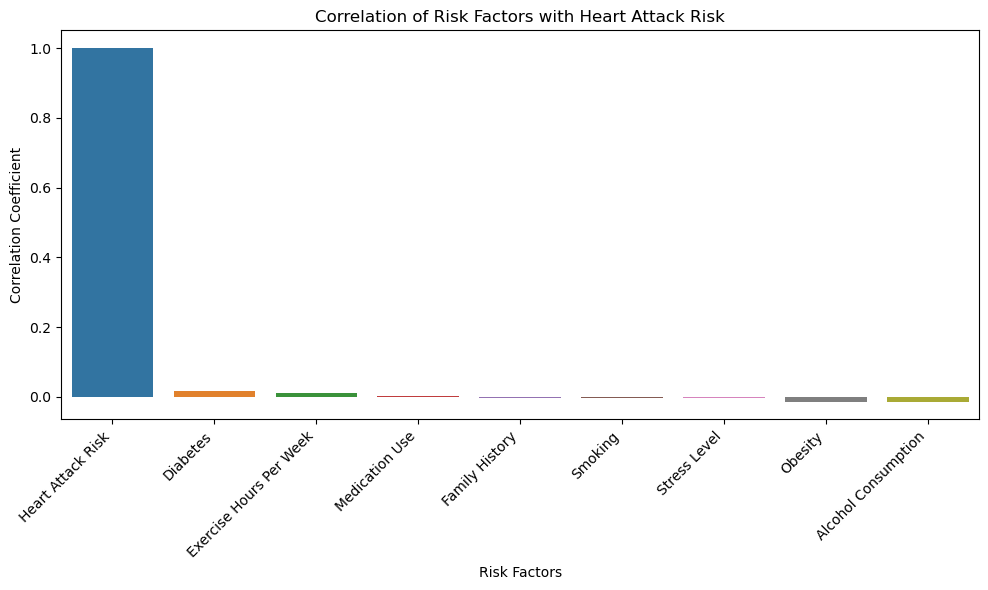

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation of risk factors with heart attack risk
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Risk Factors with Heart Attack Risk')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Risk Factors')

plt.tight_layout()
plt.show()


In [1]:
import tkinter as tk
from tkinter import messagebox

# Function to collect and show responses
def submit_responses():
    responses = {
        "Do you have diabetes?": var_diabetes.get(),
        "Do you have a family history of heart disease?": var_family_history.get(),
        "Are you a smoker?": var_smoking.get(),
        "Are you considered obese based on your BMI?": var_obesity.get(),
        "Do you consume alcohol regularly?": var_alcohol.get(),
        "Do you exercise less than 2 hours per week?": var_exercise.get(),
        "Are you currently on any long-term medication?": var_medication.get(),
        "Do you frequently experience stress?": var_stress.get(),
    }
    # Here, you would add your logic to match responses with your dataset
    # For demonstration, let's just show the responses
    response_text = "\n".join([f"{k}: {'Yes' if v else 'No'}" for k, v in responses.items()])
    messagebox.showinfo("Responses", response_text)



In [2]:
# Create the main window
root = tk.Tk()
root.title("Heart Attack Risk Questionnaire")

# Define variables for each question (1 for Yes, 0 for No)
var_diabetes = tk.IntVar()
var_family_history = tk.IntVar()
var_smoking = tk.IntVar()
var_obesity = tk.IntVar()
var_alcohol = tk.IntVar()
var_exercise = tk.IntVar()
var_medication = tk.IntVar()
var_stress = tk.IntVar()



In [3]:
# Define questions
questions = [
    ("Do you have diabetes?", var_diabetes),
    ("Do you have a family history of heart disease?", var_family_history),
    ("Are you a smoker?", var_smoking),
    ("Are you considered obese based on your BMI?", var_obesity),
    ("Do you consume alcohol regularly?", var_alcohol),
    ("Do you exercise less than 2 hours per week?", var_exercise),
    ("Are you currently on any long-term medication?", var_medication),
    ("Do you frequently experience stress?", var_stress),
]




In [4]:
 # Generate question checkboxes
for text, var in questions:
    tk.Checkbutton(root, text=text, variable=var).pack(anchor=tk.W)


In [5]:
# Submit button
submit_btn = tk.Button(root, text="Submit", command=submit_responses)
submit_btn.pack()


In [1]:
import threading

def long_running_task():
    # Place the code for your long-running task here
    pass

# Modify your event handler to start the long-running task in a new thread
def start_long_running_task():
    threading.Thread(target=long_running_task).start()


In [2]:
import tkinter as tk

# Initialize the main window
root = tk.Tk()
root.title("My Application")


''

In [3]:
# Run the GUI event loop

# This takes too long to run. need another method!

root.mainloop()


In [6]:
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


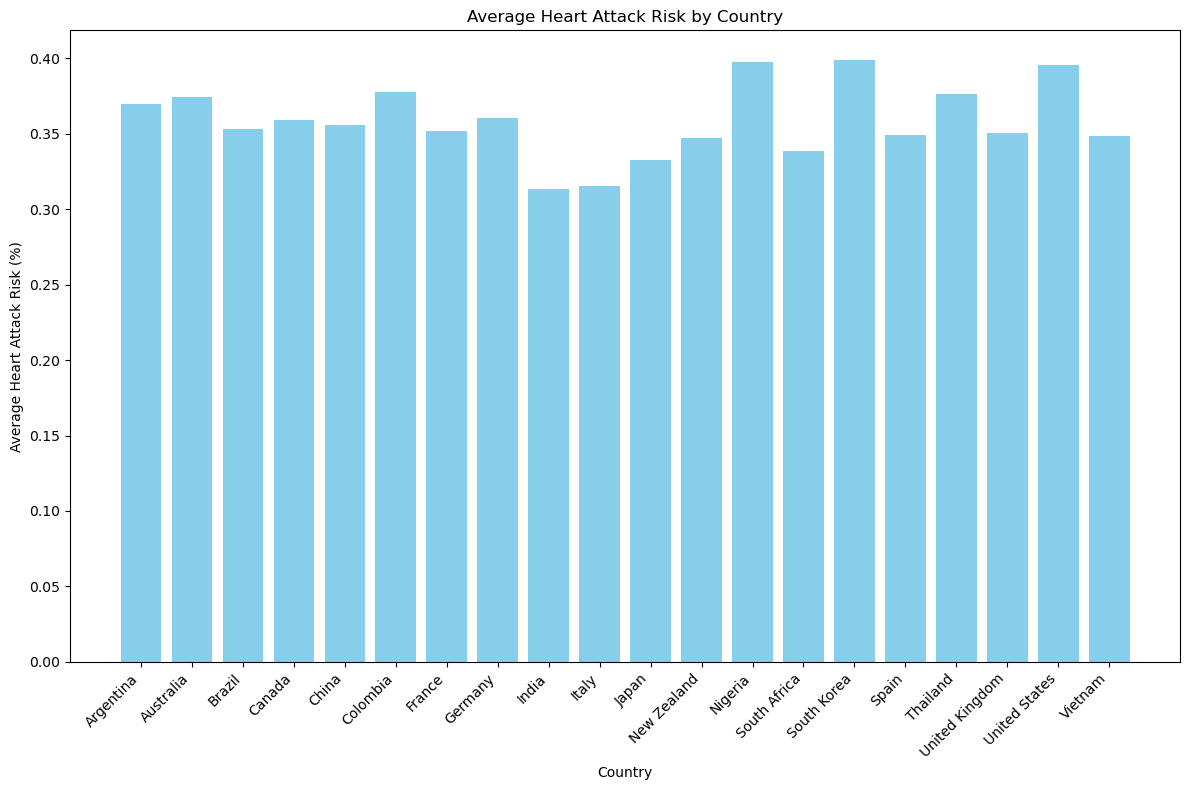

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# Assuming 'Country' is the column with country names and 'HeartAttackRisk' is the column with risk levels
# If your column names differ, adjust them accordingly.
countries = data['Country'].unique()  # This ensures we get each country once if they're listed multiple times.

# For simplicity, let's calculate the average risk per country if multiple entries per country exist.
average_risks = data.groupby('Country')['Heart Attack Risk'].mean()

# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(average_risks.index, average_risks, color='skyblue')

plt.xlabel('Country')
plt.ylabel('Average Heart Attack Risk (%)')
plt.title('Average Heart Attack Risk by Country')
plt.xticks(rotation=45, ha="right")  # Rotate country names for better readability

plt.tight_layout()  # Adjust layout to make room for the rotated country names
plt.show()


In [7]:
def ask_question(question):
    response = input(question + " (Yes/No): ").strip().lower()
    return response in ['yes', 'y']

questions = [
    "Do you have diabetes?",
    "Do you have a family history of heart disease?",
    # Add more questions as needed.
]

responses = {}
for question in questions:
    responses[question] = ask_question(question)

# Process the responses as needed.
print("Your responses:", responses)


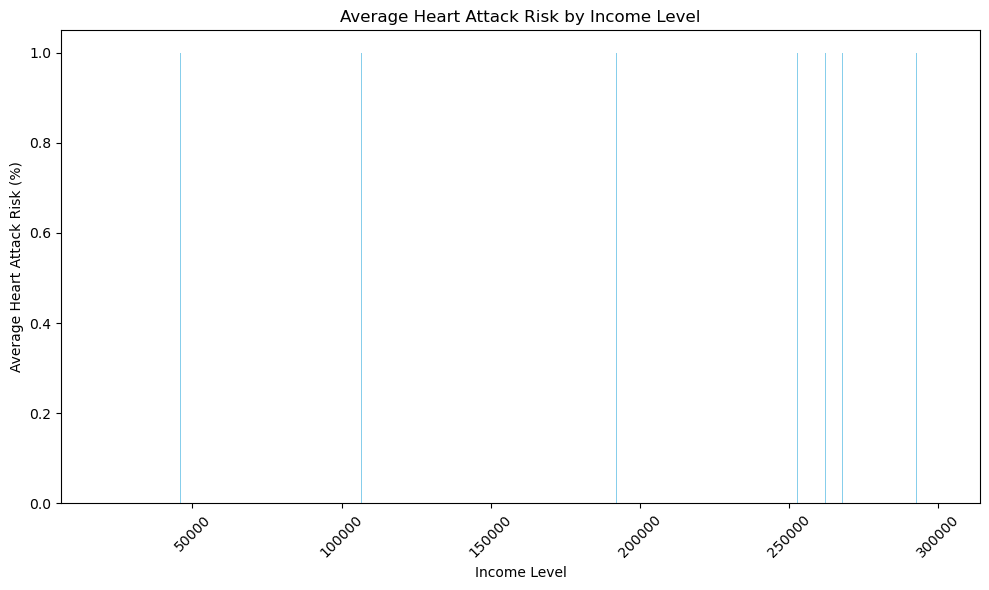

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# Assuming 'Income' is the column with income levels and 'HeartAttackRisk' is the column with risk levels
# If your column names differ, adjust them accordingly.
incomes = data['Income'].unique()

# For simplicity, let's calculate the average risk per income level if multiple entries per income level exist.
average_risks = data.groupby('Income')['Heart Attack Risk'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(average_risks.index, average_risks, color='skyblue')

plt.xlabel('Income Level')
plt.ylabel('Average Heart Attack Risk (%)')
plt.title('Average Heart Attack Risk by Income Level')
plt.xticks(rotation=45)  # Rotate income levels for better readability

plt.tight_layout()  # Adjust layout
plt.show()


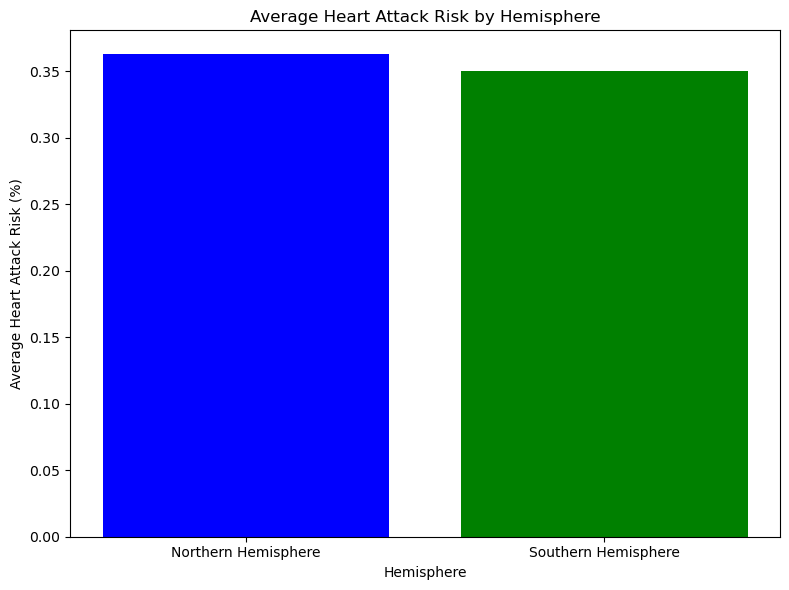

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# This assumes you have a 'Hemisphere' column with values 'Northern' or 'Southern'
# Calculate the average heart attack risk per hemisphere
average_risks = data.groupby('Hemisphere')['Heart Attack Risk'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the size as needed
plt.bar(average_risks.index, average_risks, color=['blue', 'green'])  # Color coding for visual distinction

plt.xlabel('Hemisphere')
plt.ylabel('Average Heart Attack Risk (%)')
plt.title('Average Heart Attack Risk by Hemisphere')
plt.xticks(rotation=0)  # Hemispheres don't need rotation

plt.tight_layout()
plt.show()


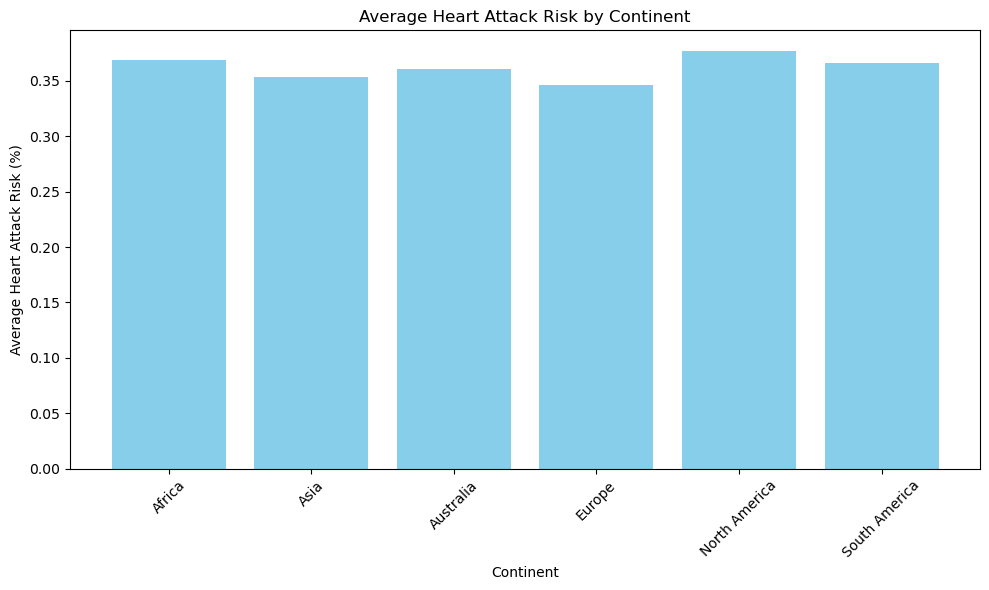

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\lisal\Documents\project_4\Resources\heart_attack_risk_with_total_factors_and_final_risk.csv")

# Assuming 'Continent' is the column with continent names and 'HeartAttackRisk' is the column with risk levels
# If your column names differ, adjust them accordingly.
continents = data['Continent'].unique()  # This ensures we get each continent once if they're listed multiple times.

# For simplicity, let's calculate the average risk per continent if multiple entries per continent exist.
average_risks = data.groupby('Continent')['Heart Attack Risk'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(average_risks.index, average_risks, color='skyblue')

plt.xlabel('Continent')
plt.ylabel('Average Heart Attack Risk (%)')
plt.title('Average Heart Attack Risk by Continent')
plt.xticks(rotation=45)  # Rotate continent names for better readability

plt.tight_layout()  # Adjust layout to make room for the rotated continent names
plt.show()


In [4]:
from flask import Flask, request, render_template_string

app = Flask(__name__)

HTML = '''
<!doctype html>
<title>Heart Attack Risk Questionnaire</title>
<form method="post">
    Do you have diabetes? <input type="checkbox" name="diabetes"><br>
    Do you have a family history of heart disease? <input type="checkbox" name="family_history"><br>
    <input type="submit" value="Submit">
</form>
'''

@app.route('/', methods=['GET', 'POST'])
def questionnaire():
    if request.method == 'POST':
        diabetes = 'diabetes' in request.form
        family_history = 'family_history' in request.form
        # Process and/or display the results here
        return f'Diabetes: {diabetes}, Family history: {family_history}'
    return render_template_string(HTML)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1